## Mapping

This notebook shows how to map using the [geopandas](http://geopandas.org/) package which basically combines a pandas dataframe with a GIS shape file from which a map can be produce. There are several critical steps in this:

- First, getting geopandas properly installed. This can be hard, but I've come up with some workarounds.

- Finding a shape file. A [shapefile](https://en.wikipedia.org/wiki/Shapefile) esstinally allows us to "draw" the map. These are all over the place...simply google "what you want" + shapefile and you will probably find it. For example, last semster I found major roads for Tanzania shape file with very little effort. 

- Once these two steps have been overcome, we essentially know how to do everything else since geopandas builds on the pandas framework.

In this notebook we will aim to...
 - Aim to get familiar with the basic maping properties
 
 - Replicate the [FT graphic for NYC](https://www.instagram.com/p/BhwQPe1gWvC/?hl=en&taken-by=financialtimes).

---
### Installing Geopands

Unfortunatly, this is not the smoothest process. But let me walk you through this.

- **Step 1.** First, in the terminal add ``conda -config --add chanels conda-forge`` which specifies to grab any package (through conda) from the conda-forge chanel/repository. 


- **Step 2.** Do `conda install geopandas`. If no error messages are kicked back, try to run the preamble below. If no error is returned, then great. Ignore the next steps. If an error is returned, then do the following.


- **Step 3.** **ONLY IF MAC** Try `pip install geopandas`. If no error messages are kicked back, try to run the preamble below. If no error is returned, then great. I don't advise to try this on windows as it may start to ask about your c++ compiler (mtwn) and we don't want to go there. 


- **Step 4.** If this is not working. The do the following, `conda update --all` which will update your conda distribution. This may take some time (10-15mins). Then I think everything should work. 

---

Below is the preamble...

In [54]:
from IPython.display import display, Image # Displays things nicely
import pandas as pd # Key tool 
import matplotlib.pyplot as plt # Helps plot
import numpy as np # Numerical operations
import os

from census import Census # This is new...
from us import states

import fiona # Needed for geopandas to run
import geopandas as gpd # this is the main geopandas 
from shapely.geometry import Point, Polygon # also needed

##########################
# Then this stuff below allows us to make a nice inset


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

### NYC MAP

Ok, so I types "nyc shapefiles zipcode" into google and grabbed the first one. I think it we really want to be precise, we should find zipcode tabulation areas (which are slightly different), but it is ok. This will come as a zip file. Create a folder wherever you are working and unzip the file there. **You need all those files**. 

One thing to note about these files is that can sometimes be very large depending upon the "resolution" or how accurate the map is. Another thing to note is that this shape file also has the problem in that the "polygons" are not defined by latitued and longitude. This is a bit prolematic if we want to merge it up with other locational data. 

In [152]:
cwd = os.getcwd()

regions_shape = cwd + "\\shape_files\\NYC\\ZIP_CODE_040114.shx"

In [153]:
regions_shape

'C:\\data_bootcamp\\data_bootcamp_spring_2018\\week13\\shape_files\\NYC\\ZIP_CODE_040114.shx'

Now here is the basic command to get the file into python. You just point it to the `.shx` file and use the `gpd.read_file` command. Very simple.

In [154]:
nyc_map = gpd.read_file(regions_shape)

In [155]:
type(nyc_map)

geopandas.geodataframe.GeoDataFrame

Then just like pandas, we can do very simmilar operations. Like look at the head....

In [156]:
nyc_map.head(10)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [157]:
nyc_map.dtypes

ZIPCODE        object
BLDGZIP        object
PO_NAME        object
POPULATION    float64
AREA          float64
STATE          object
COUNTY         object
ST_FIPS        object
CTY_FIPS       object
URL            object
SHAPE_AREA    float64
SHAPE_LEN     float64
geometry       object
dtype: object

The key feature of this is the `geometry` column. NEVER change the name of this. It is perserved for retaining the shape of that particular area. This is the key feature that allows us to map....within each entry of the `geometry` column, there is essentially instructions to draw lines in a way to create the boundries or shape of that local.

Other than the `geometry` column, it is essentially a standard DataFrame. This is why I really like this package.
---


### Making a map 

Very simple, we use our fig, ax approach and watch the magic happen....

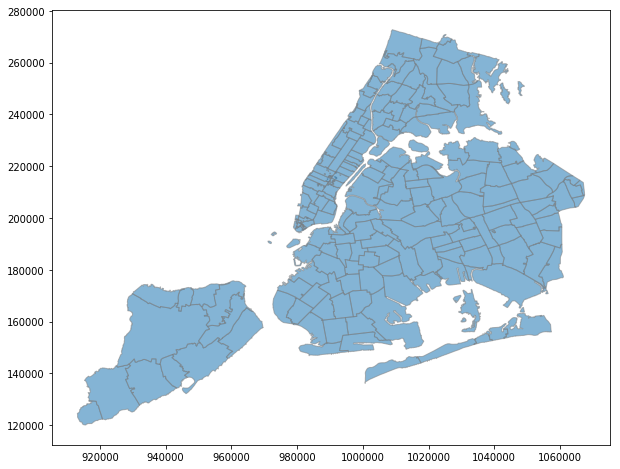

In [158]:
fig, ax = plt.subplots(figsize = (10,8))

# First create the map for the urban share

nyc_map.plot(ax = ax, # So the geopandas has a built in plot feature, we just pass our "ax to it
             edgecolor='tab:grey', # Tell it the edge color
             alpha = 0.55) # Transparent

plt.show()

**THERE IT IS!!!!!!!!!!!!!!!!!!!!!!!!!!**

This is quite amazing...very simple. The shape file that we brought in has population in it already. So what we can do is create a colorpath map where different areas are shaded with different intensities.

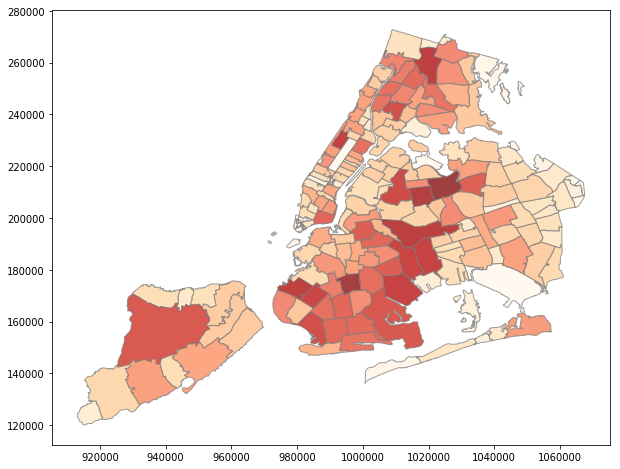

In [159]:
fig, ax = plt.subplots(figsize = (10,8))

# First create the map for the urban share

nyc_map.plot(ax = ax, edgecolor='tab:grey',
             column='POPULATION', # THIS IS NEW, it says color it based on this column
             cmap='OrRd', # This is the color map scheme https://matplotlib.org/examples/color/colormaps_reference.html
             alpha = 0.75)

plt.show()

In [160]:
nyc_map.ZIPCODE = nyc_map.ZIPCODE.astype(int)

nyc_zips = nyc_map.ZIPCODE.tolist()

In [161]:
nyc_zips = "".join(str(nyc_zips))
nyc_zips = nyc_zips[1:-1]

In [162]:
my_api_key = '34e40301bda77077e24c859c6c6c0b721ad73fc7'
# This is my api_key

c = Census(my_api_key)
# This will create an object c which has methods associated with it.
# We will see  these below.

type(c) 
# Per the discussion below, try c.tab and see the options. 

census.core.Census

In [163]:
code = ("NAME","B19013_001E", "B01001_001E") 
# The new code I added was median houshold income:
    
zip_nyc = pd.DataFrame(c.acs5.get(code, 
                                         {'for': 'zip code tabulation area:' + nyc_zips }, year=2015))

zip_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
B01001_001E                 209 non-null object
B19013_001E                 182 non-null object
NAME                        209 non-null object
zip code tabulation area    209 non-null object
dtypes: object(4)
memory usage: 6.6+ KB


'B19013_001E'

In [165]:
zip_nyc['Income']

0      11.371373
1      10.426024
2      11.494262
3      11.692669
4      11.729600
5      11.725542
6      12.429220
7      10.986817
8      11.529960
9      11.606580
10     11.521479
11     11.479027
12     11.643717
13     11.560057
14     11.575158
15     11.566466
16     11.451284
17           NaN
18     11.653348
19     11.747033
20     11.621583
21     11.642540
22     11.212698
23     10.763504
24     10.615996
25     11.652157
26     10.352970
27     10.410185
28     10.590969
29     10.526212
         ...    
179    10.921089
180    11.304042
181    11.190762
182    11.305741
183    11.132748
184    11.062819
185    10.974934
186    11.035809
187    11.026467
188    10.972774
189    10.996417
190    11.018564
191    11.349877
192    11.037773
193    11.253455
194    11.097516
195    11.114699
196    11.137272
197          NaN
198    10.833721
199    10.668118
200    10.969508
201    10.872105
202    11.066716
203          NaN
204    10.645972
205    10.648444
206    10.8833

In [164]:
zip_nyc.rename(columns={code[1]:"Income", code[2]: "Population"}, inplace=True)

zip_nyc['Income'] = np.log(zip_nyc["Income"].astype(float))

zip_nyc['Population'] = zip_nyc["Population"].astype(float)

zip_nyc['ZIPCODE'] = zip_nyc['zip code tabulation area'].astype(int)

In [130]:
zip_nyc.info()

nyc_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
Population                  209 non-null float64
Income                      182 non-null float64
NAME                        209 non-null object
zip code tabulation area    209 non-null object
ZIPCODE                     209 non-null int32
dtypes: float64(2), int32(1), object(2)
memory usage: 7.4+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
ZIPCODE       263 non-null int32
BLDGZIP       263 non-null object
PO_NAME       263 non-null object
POPULATION    263 non-null float64
AREA          263 non-null float64
STATE         263 non-null object
COUNTY        263 non-null object
ST_FIPS       263 non-null object
CTY_FIPS      263 non-null object
URL           263 non-null object
SHAPE_AREA    263 non-null float64
SHAPE_LEN     263 non-null float64
geometry      263 non-null object
dtypes: float64(4), int32(1), objec

In [166]:
nyc_map  = nyc_map.merge(zip_nyc, on='ZIPCODE', how = "outer")

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


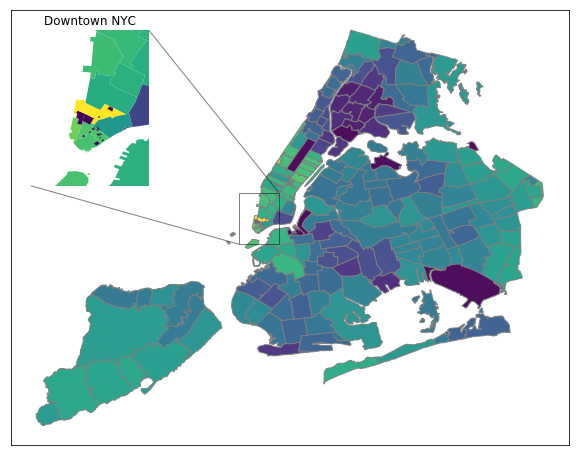

In [170]:
fig, ax = plt.subplots(figsize = (10,8))

# First create the map for the urban share

nyc_map.plot(ax = ax, edgecolor='tab:grey', column='Income', cmap='viridis', alpha = 0.95)


axins = zoomed_inset_axes(ax, 3, loc=2, borderpad=2)  # zoom = 6

nyc_map.plot(ax = axins, column='Income', cmap='viridis')

x1, x2, y1, y2 = 975000, 987000, 190000, 210000
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.set_title("Downtown NYC")
#fix the number of ticks on the inset axes
#axins.yaxis.get_major_locator().set_params(nbins=7)
#axins.xaxis.get_major_locator().set_params(nbins=7)

mark_inset(ax, axins, loc1=3, loc2=1, fc="none", alpha = 0.5)

axins.spines["right"].set_visible(False)
axins.spines["top"].set_visible(False)
axins.spines["left"].set_visible(False)
axins.spines["bottom"].set_visible(False)

#axins.Tick.remove()

axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#axins.plot()

plt.show()

In [151]:
nyc_map.Income

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
         ...    
442    10.921089
443    11.304042
444    11.190762
445    11.305741
446    11.132748
447    11.062819
448    10.974934
449    11.035809
450    11.026467
451    10.972774
452    10.996417
453    11.018564
454    11.349877
455    11.037773
456    11.253455
457    11.097516
458    11.114699
459    11.137272
460          NaN
461    10.833721
462    10.668118
463    10.969508
464    10.872105
465    11.066716
466          NaN
467    10.645972
468    10.648444
469    10.8833

---

### US County Map

In [28]:
cwd = os.getcwd()

regions_shape = cwd + "\\shape_files\\UScounties\\cb_2017_us_county_500k.shx"

In [29]:
us_map = gpd.read_file(regions_shape)

In [30]:
type(us_map)

geopandas.geodataframe.GeoDataFrame

In [31]:
us_map.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,005,00161528,0500000US01005,01005,Barbour,06,2292144656,50538698,"POLYGON ((-85.74803199999999 31.619181, -85.74..."
1,01,023,00161537,0500000US01023,01023,Choctaw,06,2365869837,19144469,"POLYGON ((-88.47322699999999 31.893856, -88.46..."
2,01,035,00161543,0500000US01035,01035,Conecuh,06,2201948618,6643480,"POLYGON ((-87.42720399999999 31.26436, -87.425..."
3,01,051,00161551,0500000US01051,01051,Elmore,06,1601762124,99965171,"POLYGON ((-86.41333499999999 32.750591, -86.37..."
4,01,065,00161558,0500000US01065,01065,Hale,06,1667907107,32423356,"POLYGON ((-87.870464 32.762442, -87.868184 32...."


In [32]:
us_map.set_index("STATEFP", inplace = True)

In [36]:
us_map.drop(["02","03","15","43","14","79","78","72","69","60","66"], inplace = True)

In [37]:
us_map.index.unique()

Index(['01', '04', '05', '06', '08', '09', '11', '12', '13', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '34', '35', '36', '37', '38', '39', '40', '41', '42', '45', '46',
       '47', '48', '49', '51', '53', '54', '55', '56', '10', '32', '33', '44',
       '50'],
      dtype='object', name='STATEFP')

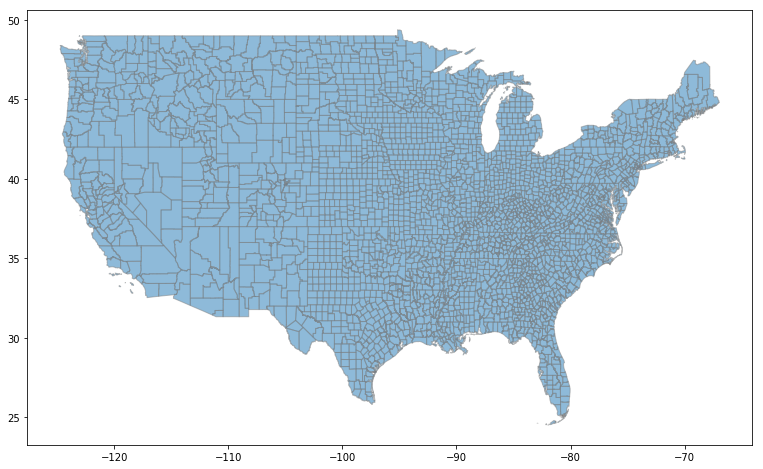

In [38]:
fig, ax = plt.subplots(figsize = (13,8))

# First create the map for the urban share

us_map.plot(ax = ax, edgecolor='tab:grey', alpha = 0.5)

plt.show()